In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, plot_roc_curve, confusion_matrix, f1_score, classification_report

In [2]:
df = pd.read_csv('component_failure_prediction.csv')

In [3]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [5]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
UDI,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
Product ID,10000,10000,M14860,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,10000,3,L,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Air temperature [K],10000.0,NaN,NaN,NaN,300.00493,2.000259,295.3,298.3,300.1,301.5,304.5
Process temperature [K],10000.0,NaN,NaN,NaN,310.00556,1.483734,305.7,308.8,310.1,311.1,313.8
Rotational speed [rpm],10000.0,NaN,NaN,NaN,1538.7761,179.284096,1168.0,1423.0,1503.0,1612.0,2886.0
Torque [Nm],10000.0,NaN,NaN,NaN,39.98691,9.968934,3.8,33.2,40.1,46.8,76.6
Tool wear [min],10000.0,NaN,NaN,NaN,107.951,63.654147,0.0,53.0,108.0,162.0,253.0
Target,10000.0,NaN,NaN,NaN,0.0339,0.180981,0.0,0.0,0.0,0.0,1.0
Failure Type,10000,6,No Failure,9652,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
def preprocess(data):
    data1 = pd.get_dummies(data,prefix = ['Type'],columns = ['Type'],drop_first = False)
    
    data1.drop(['Product ID'], axis = 1, inplace = True)
    
    return data, data1

In [7]:
data, data_model=preprocess(df)

In [8]:
data.shape

(10000, 10)

In [9]:
data_model

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Type_H,Type_L,Type_M
0,1,298.1,308.6,1551,42.8,0,0,No Failure,0,0,1
1,2,298.2,308.7,1408,46.3,3,0,No Failure,0,1,0
2,3,298.1,308.5,1498,49.4,5,0,No Failure,0,1,0
3,4,298.2,308.6,1433,39.5,7,0,No Failure,0,1,0
4,5,298.2,308.7,1408,40.0,9,0,No Failure,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,298.8,308.4,1604,29.5,14,0,No Failure,0,0,1
9996,9997,298.9,308.4,1632,31.8,17,0,No Failure,1,0,0
9997,9998,299.0,308.6,1645,33.4,22,0,No Failure,0,0,1
9998,9999,299.0,308.7,1408,48.5,25,0,No Failure,1,0,0


In [10]:
data.Type.unique()

array(['M', 'L', 'H'], dtype=object)

In [11]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Target                   10000 non-null  int64  
 7   Failure Type             10000 non-null  object 
 8   Type_H                   10000 non-null  uint8  
 9   Type_L                   10000 non-null  uint8  
 10  Type_M                   10000 non-null  uint8  
dtypes: float64(3), int64(4), object(1), uint8(3)
memory usage: 654.4+ KB


# Exploratory Data Analysis

(array([0, 1, 2]), [Text(0, 0, 'M'), Text(1, 0, 'L'), Text(2, 0, 'H')])

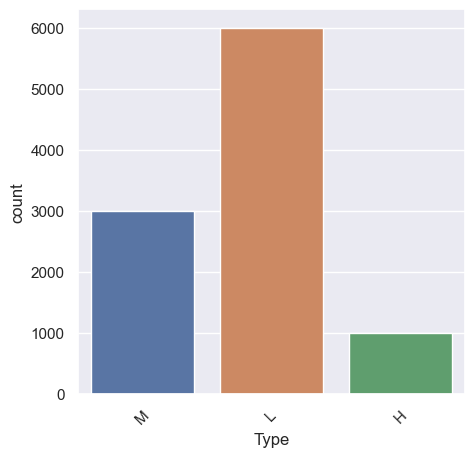

In [12]:
plt.figure(figsize=(5,5))
sns.countplot(data['Type'])
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'No Failure'),
  Text(1, 0, 'Power Failure'),
  Text(2, 0, 'Tool Wear Failure'),
  Text(3, 0, 'Overstrain Failure'),
  Text(4, 0, 'Random Failures'),
  Text(5, 0, 'Heat Dissipation Failure')])

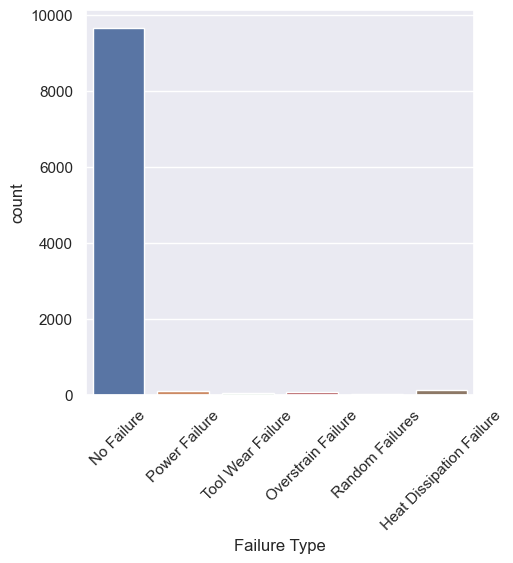

In [13]:
plt.figure(figsize=(5,5))
sns.countplot(data['Failure Type'])
plt.xticks(rotation = 45)

<AxesSubplot:xlabel='Rotational speed [rpm]', ylabel='Torque [Nm]'>

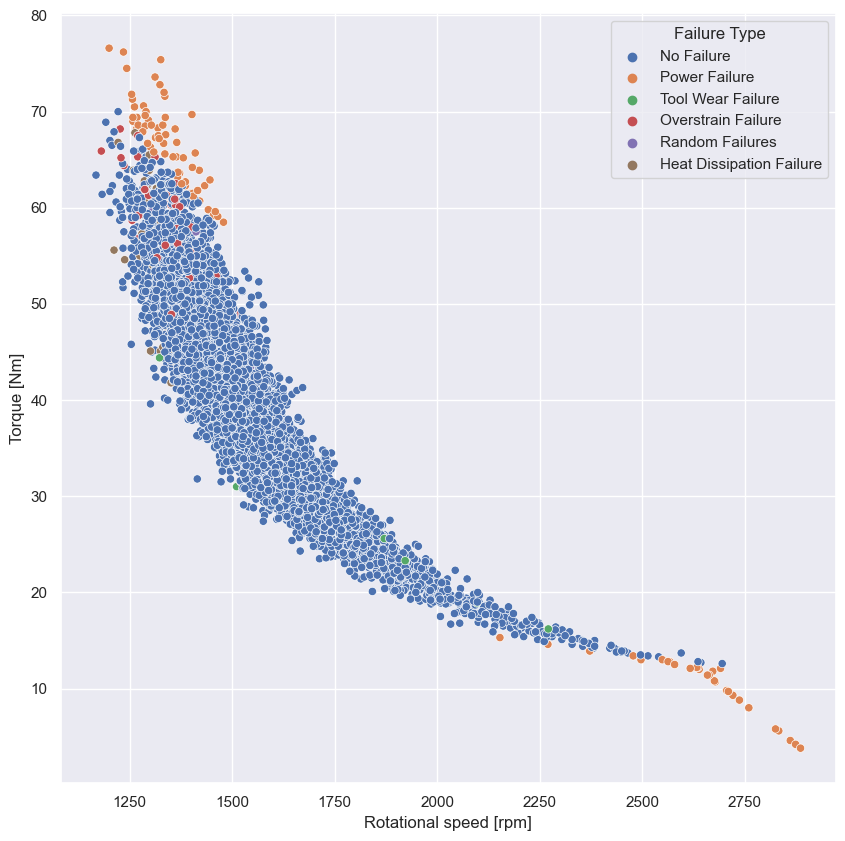

In [57]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=data,x="Rotational speed [rpm]",y="Torque [Nm]",hue="Failure Type")

<AxesSubplot:xlabel='Air temperature [K]', ylabel='Tool wear [min]'>

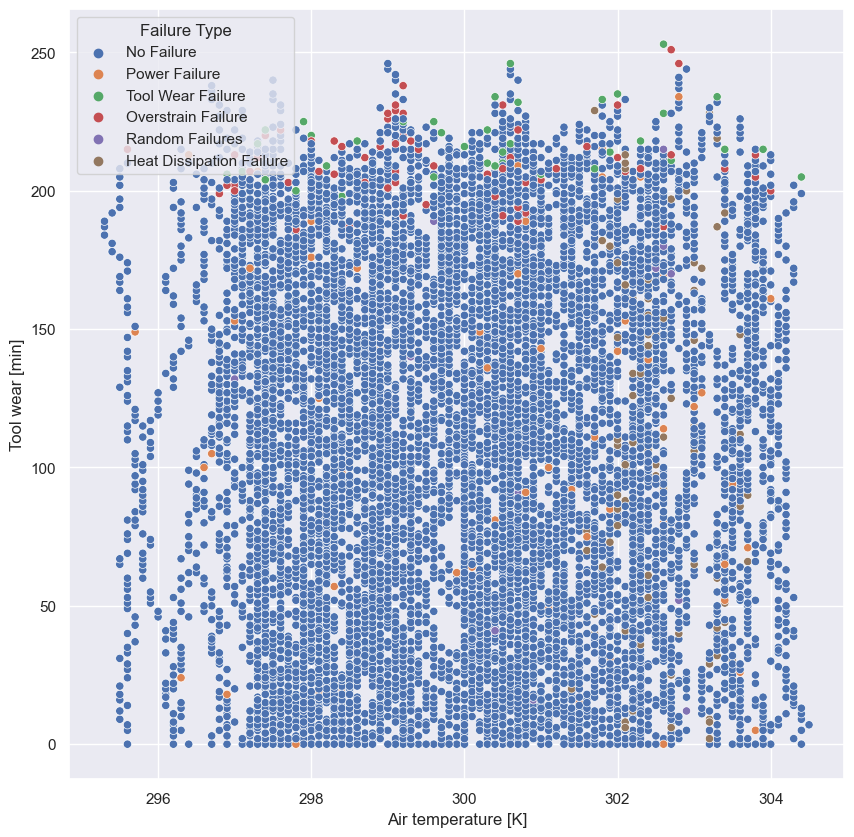

In [15]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=data,x="Air temperature [K]",y="Tool wear [min]",hue="Failure Type")

<AxesSubplot:xlabel='Process temperature [K]', ylabel='Tool wear [min]'>

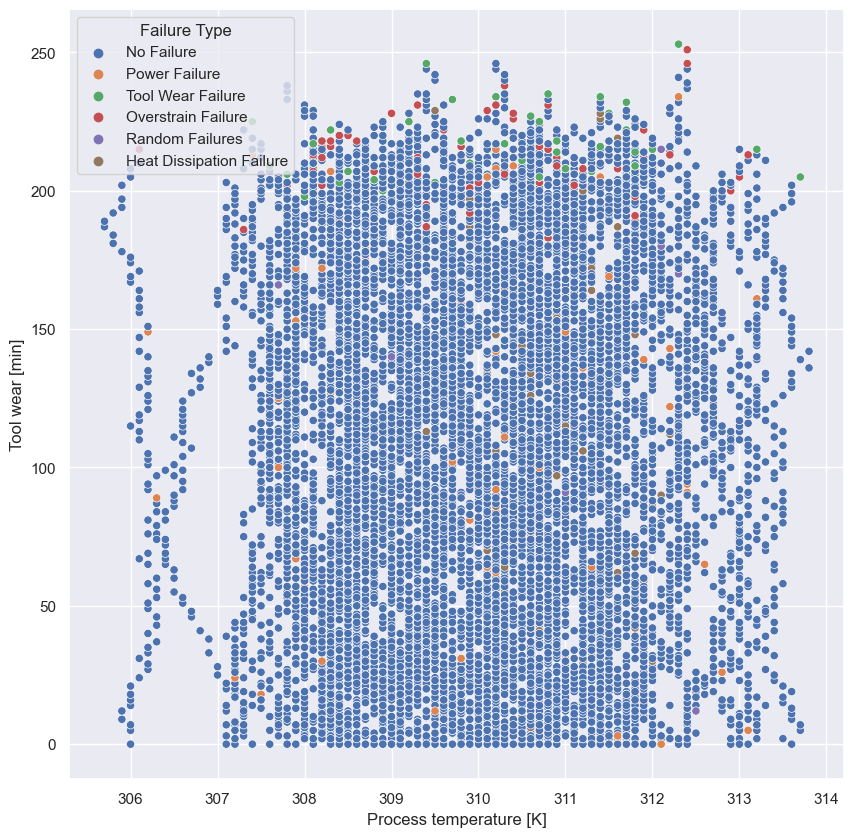

In [55]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=data,x="Process temperature [K]",y="Tool wear [min]",hue="Failure Type")

<AxesSubplot:xlabel='Torque [Nm]', ylabel='Tool wear [min]'>

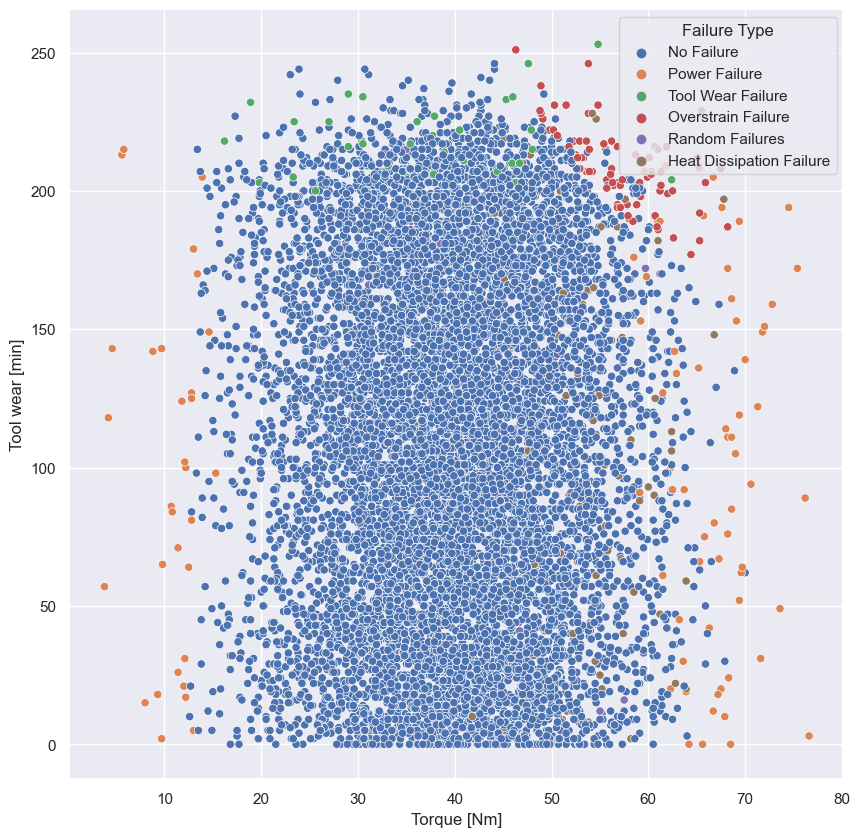

In [56]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=data,x="Torque [Nm]",y="Tool wear [min]",hue="Failure Type")

<AxesSubplot:xlabel='Torque [Nm]', ylabel='Target'>

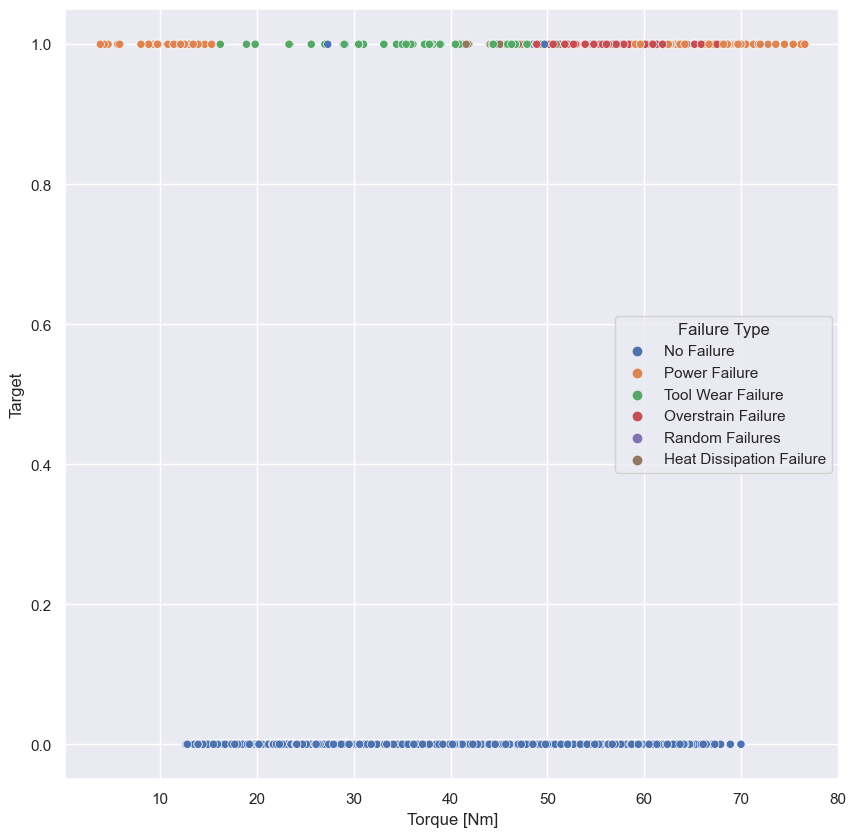

In [58]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=data,x="Torque [Nm]",y="Target",hue="Failure Type")

# Data Preparation

In [17]:
data_model.loc[data_model['Failure Type']== 'No Failure','Failure Type'] = 0
data_model.loc[data_model['Failure Type']== 'Power Failure','Failure Type'] = 1
data_model.loc[data_model['Failure Type']== 'Tool Wear Failure','Failure Type'] = 2
data_model.loc[data_model['Failure Type']== 'Overstrain Failure','Failure Type'] = 3
data_model.loc[data_model['Failure Type']== 'Random Failures','Failure Type'] = 4
data_model.loc[data_model['Failure Type']== 'Heat Dissipation Failure','Failure Type'] = 5

In [18]:
data_model['Failure Type'] = data_model['Failure Type'].astype('int')
data_model

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Type_H,Type_L,Type_M
0,1,298.1,308.6,1551,42.8,0,0,0,0,0,1
1,2,298.2,308.7,1408,46.3,3,0,0,0,1,0
2,3,298.1,308.5,1498,49.4,5,0,0,0,1,0
3,4,298.2,308.6,1433,39.5,7,0,0,0,1,0
4,5,298.2,308.7,1408,40.0,9,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,298.8,308.4,1604,29.5,14,0,0,0,0,1
9996,9997,298.9,308.4,1632,31.8,17,0,0,1,0,0
9997,9998,299.0,308.6,1645,33.4,22,0,0,0,0,1
9998,9999,299.0,308.7,1408,48.5,25,0,0,1,0,0


# Over sampling

In [19]:
# pip install imblearn
features_df= data_model.drop(['Target','Failure Type'], axis=1)
target1_df= data_model['Failure Type']
target2_df= data_model['Target']

In [20]:
from sklearn.model_selection import train_test_split

features1_train, features1_val, target1_train, target1_val = train_test_split(features_df, target1_df, test_size=0.2, random_state=100, stratify=target1_df)

In [21]:
# from imblearn.over_sampling import SMOTE
# sm= SMOTE()
# features1_train_smote, target1_train_smote = sm.fit_resample(features1_train,target1_train)

In [22]:
target1_train.value_counts()

0    7722
5      90
1      76
3      62
2      36
4      14
Name: Failure Type, dtype: int64

In [23]:
target1_train.value_counts()

0    7722
5      90
1      76
3      62
2      36
4      14
Name: Failure Type, dtype: int64

In [24]:
# from imblearn.under_sampling import RandomUnderSampler
# under= RandomUnderSampler()
# features1_train_under, target1_train_under = under.fit_resample(features1_train,target1_train)

In [25]:
# target1_train_under.value_counts()

In [26]:
features2_train, features2_val, target2_train, target2_val = train_test_split(features_df, target2_df, test_size=0.2, random_state=100, stratify=target2_df)


In [27]:
# from sklearn.model_selection import train_test_split

# features1_train, features1_val, target1_train, target1_val = train_test_split(features_df, target1_df, test_size=0.2, random_state=100, stratify=target1_df)

In [28]:
# features2_train, features2_val, target2_train, target2_val = train_test_split(features_df, target2_df, test_size=0.2, random_state=100, stratify=target2_df)

In [29]:
features1_train.shape,features1_val.shape,target1_train.shape,target1_val.shape

((8000, 9), (2000, 9), (8000,), (2000,))

In [30]:
target1_train.value_counts()

0    7722
5      90
1      76
3      62
2      36
4      14
Name: Failure Type, dtype: int64

In [31]:
features2_train.shape,features2_val.shape,target2_train.shape,target2_val.shape

((8000, 9), (2000, 9), (8000,), (2000,))

In [32]:
target2_val.value_counts()

0    1932
1      68
Name: Target, dtype: int64

In [33]:
LR_model1 = LogisticRegression()

In [34]:
features1_train.info(), features2_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 2455 to 8235
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      8000 non-null   int64  
 1   Air temperature [K]      8000 non-null   float64
 2   Process temperature [K]  8000 non-null   float64
 3   Rotational speed [rpm]   8000 non-null   int64  
 4   Torque [Nm]              8000 non-null   float64
 5   Tool wear [min]          8000 non-null   int64  
 6   Type_H                   8000 non-null   uint8  
 7   Type_L                   8000 non-null   uint8  
 8   Type_M                   8000 non-null   uint8  
dtypes: float64(3), int64(3), uint8(3)
memory usage: 460.9 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 6452 to 7032
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI          

(None, None)

In [35]:
LR_model1.fit(features1_train, target1_train)

LogisticRegression()

In [36]:
predictions = LR_model1.predict(features1_train)
predictions_val = LR_model1.predict(features1_val)


In [37]:
compare = pd.DataFrame({'Actuals' : target1_train, 'predictions': predictions})
compare_val = pd.DataFrame({'Actuals': target1_val, 'predictions': predictions_val})

In [38]:
compare_val

,Actuals,predictions
8128,0,0
418,0,0
4312,0,0
4566,0,0
7144,0,0
...,...,...
4752,0,0
4386,0,0
9141,0,0
8795,0,0


In [39]:
accuracy = np.sum(compare['Actuals'] == compare['predictions'])/compare.shape[0]
accuracy_val = np.sum(compare_val['Actuals'] == compare_val['predictions'])/compare_val.shape[0]

In [40]:
accuracy, accuracy_val 

(0.966625, 0.967)

In [41]:
print ('F1 score for the train set predction', f1_score(y_true= target1_train, y_pred= predictions, average='weighted'))
print ('F1 score for the train set validation', f1_score(y_true= target1_val, y_pred= predictions_val, average='weighted'))

F1 score for the train set predction 0.9518208913576545
F1 score for the train set validation 0.9520817293849254


In [42]:
print(classification_report(y_true = target1_val, y_pred = predictions_val))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1930
           1       1.00      0.21      0.35        19
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00        16
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00        22

    accuracy                           0.97      2000
   macro avg       0.33      0.20      0.22      2000
weighted avg       0.94      0.97      0.95      2000



In [43]:
LR_model2 = LogisticRegression()
LR_model2.fit(features2_train, target2_train)
predictions2 = LR_model2.predict(features2_train)
predictions2_val = LR_model2.predict(features2_val)
compare = pd.DataFrame({'Actuals' : target2_train, 'predictions': predictions2})
compare_val = pd.DataFrame({'Actuals': target2_val, 'predictions': predictions2_val})
accuracy = np.sum(compare['Actuals'] == compare['predictions'])/compare.shape[0]
accuracy_val = np.sum(compare_val['Actuals'] == compare_val['predictions'])/compare_val.shape[0]
print('accuracy : ', accuracy, 'accuracy_val : ',accuracy_val)
print ('F1 score for the train set predction', f1_score(y_true= target2_train, y_pred= predictions2, average='weighted'))
print ('F1 score for the train set validation', f1_score(y_true= target2_val, y_pred= predictions2_val, average='weighted'))
print(confusion_matrix(y_true = target2_val, y_pred = predictions2_val))

accuracy :  0.97 accuracy_val :  0.969
F1 score for the train set predction 0.9619554541305341
F1 score for the train set validation 0.9596105841723819
[[1927    5]
 [  57   11]]


# Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()

In [45]:
clf1.fit(features1_train, target1_train)

DecisionTreeClassifier()

In [46]:
predicted1_train = clf1.predict(features1_train)
predicted1_val = clf1.predict(features1_val)
compare = pd.DataFrame({'Actuals' : target1_train, 'predictions': predicted1_train})
compare_val = pd.DataFrame({'Actuals': target1_val, 'predictions': predicted1_val})
accuracy = np.sum(compare['Actuals'] == compare['predictions'])/compare.shape[0]
accuracy_val = np.sum(compare_val['Actuals'] == compare_val['predictions'])/compare_val.shape[0]
print('accuracy : ', accuracy, 'accuracy_val : ',accuracy_val)
print ('F1 score for the train set predction', f1_score(y_true= target1_train, y_pred= predicted1_train, average='weighted'))
print ('F1 score for the train set validation', f1_score(y_true= target1_val, y_pred= predicted1_val, average='weighted'))
print(classification_report(y_true = target1_val, y_pred = predicted1_val))

accuracy :  1.0 accuracy_val :  0.981
F1 score for the train set predction 1.0
F1 score for the train set validation 0.9795585177706165
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1930
           1       0.81      0.68      0.74        19
           2       0.11      0.11      0.11         9
           3       0.69      0.56      0.62        16
           4       0.00      0.00      0.00         4
           5       0.91      0.95      0.93        22

    accuracy                           0.98      2000
   macro avg       0.59      0.55      0.57      2000
weighted avg       0.98      0.98      0.98      2000



In [47]:
clf2 = DecisionTreeClassifier()
clf2.fit(features2_train, target2_train)
predicted2_train = clf2.predict(features2_train)
predicted2_val = clf2.predict(features2_val)
compare = pd.DataFrame({'Actuals' : target2_train, 'predictions': predicted2_train})
compare_val = pd.DataFrame({'Actuals': target2_val, 'predictions': predicted2_val})
accuracy = np.sum(compare['Actuals'] == compare['predictions'])/compare.shape[0]
accuracy_val = np.sum(compare_val['Actuals'] == compare_val['predictions'])/compare_val.shape[0]
print('accuracy : ', accuracy, 'accuracy_val : ',accuracy_val)
print ('F1 score for the train set predction', f1_score(y_true= target2_train, y_pred= predicted2_train, average='weighted'))
print ('F1 score for the validation set predction', f1_score(y_true= target2_val, y_pred= predicted2_val, average='weighted'))
print(confusion_matrix(y_true = target2_val, y_pred = predicted2_val))

accuracy :  1.0 accuracy_val :  0.978
F1 score for the train set predction 1.0
F1 score for the validation set predction 0.9783028867505551
[[1908   24]
 [  20   48]]


# AdaBoost

In [49]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
ada1= AdaBoostClassifier()
ada1.fit(features1_train, target1_train)

predicted1_train = ada1.predict(features1_train)
predicted1_val = ada1.predict(features1_val)
compare = pd.DataFrame({'Actuals' : target1_train, 'predictions': predicted1_train})
compare_val = pd.DataFrame({'Actuals': target1_val, 'predictions': predicted1_val})
accuracy = np.sum(compare['Actuals'] == compare['predictions'])/compare.shape[0]
accuracy_val = np.sum(compare_val['Actuals'] == compare_val['predictions'])/compare_val.shape[0]
print('accuracy : ', accuracy, 'accuracy_val : ',accuracy_val)
print ('F1 score for the train set predction', f1_score(y_true= target1_train, y_pred= predicted1_train, average='weighted'))
print ('F1 score for the train set validation', f1_score(y_true= target1_val, y_pred= predicted1_val, average='weighted'))
print(classification_report(y_true = target1_val, y_pred = predicted1_val))

accuracy :  0.159 accuracy_val :  0.1515
F1 score for the train set predction 0.2556120402896987
F1 score for the train set validation 0.243417709963507
              precision    recall  f1-score   support

           0       0.91      0.14      0.25      1930
           1       0.00      0.00      0.00        19
           2       0.00      0.00      0.00         9
           3       1.00      0.12      0.22        16
           4       0.00      0.50      0.00         4
           5       0.03      0.91      0.06        22

    accuracy                           0.15      2000
   macro avg       0.32      0.28      0.09      2000
weighted avg       0.89      0.15      0.24      2000



In [50]:
ada2= AdaBoostClassifier()
ada2.fit(features2_train, target2_train)
predicted2_train = ada2.predict(features2_train)
predicted2_val = ada2.predict(features2_val)
compare = pd.DataFrame({'Actuals' : target2_train, 'predictions': predicted2_train})
compare_val = pd.DataFrame({'Actuals': target2_val, 'predictions': predicted2_val})
accuracy = np.sum(compare['Actuals'] == compare['predictions'])/compare.shape[0]
accuracy_val = np.sum(compare_val['Actuals'] == compare_val['predictions'])/compare_val.shape[0]
print('accuracy : ', accuracy, 'accuracy_val : ',accuracy_val)
print ('F1 score for the train set predction', f1_score(y_true= target2_train, y_pred= predicted2_train, average='weighted'))
print ('F1 score for the validation set predction', f1_score(y_true= target2_val, y_pred= predicted2_val, average='weighted'))
print(confusion_matrix(y_true = target2_val, y_pred = predicted2_val))

accuracy :  0.976625 accuracy_val :  0.971
F1 score for the train set predction 0.9742124683786736
F1 score for the validation set predction 0.9673450572875033
[[1917   15]
 [  43   25]]


# Gradient Boosting Classifier

In [51]:

gbc1= GradientBoostingClassifier()
gbc1.fit(features1_train, target1_train)

predicted1_train = gbc1.predict(features1_train)
predicted1_val = gbc1.predict(features1_val)
compare = pd.DataFrame({'Actuals' : target1_train, 'predictions': predicted1_train})
compare_val = pd.DataFrame({'Actuals': target1_val, 'predictions': predicted1_val})
accuracy = np.sum(compare['Actuals'] == compare['predictions'])/compare.shape[0]
accuracy_val = np.sum(compare_val['Actuals'] == compare_val['predictions'])/compare_val.shape[0]
print('accuracy : ', accuracy, 'accuracy_val : ',accuracy_val)
print ('F1 score for the train set predction', f1_score(y_true= target1_train, y_pred= predicted1_train, average='weighted'))
print ('F1 score for the train set validation', f1_score(y_true= target1_val, y_pred= predicted1_val, average='weighted'))
print(classification_report(y_true = target1_val, y_pred = predicted1_val))

accuracy :  0.99925 accuracy_val :  0.9855
F1 score for the train set predction 0.9992160547219772
F1 score for the train set validation 0.9826274617323782
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1930
           1       0.93      0.68      0.79        19
           2       0.00      0.00      0.00         9
           3       0.74      0.88      0.80        16
           4       0.00      0.00      0.00         4
           5       0.90      0.86      0.88        22

    accuracy                           0.99      2000
   macro avg       0.59      0.57      0.58      2000
weighted avg       0.98      0.99      0.98      2000



In [52]:
gbc2= GradientBoostingClassifier()
gbc2.fit(features2_train, target2_train)
predicted2_train = gbc2.predict(features2_train)
predicted2_val = gbc2.predict(features2_val)
compare = pd.DataFrame({'Actuals' : target2_train, 'predictions': predicted2_train})
compare_val = pd.DataFrame({'Actuals': target2_val, 'predictions': predicted2_val})
accuracy = np.sum(compare['Actuals'] == compare['predictions'])/compare.shape[0]
accuracy_val = np.sum(compare_val['Actuals'] == compare_val['predictions'])/compare_val.shape[0]
print('accuracy : ', accuracy, 'accuracy_val : ',accuracy_val)
print ('F1 score for the train set predction', f1_score(y_true= target2_train, y_pred= predicted2_train, average='weighted'))
print ('F1 score for the validation set predction', f1_score(y_true= target2_val, y_pred= predicted2_val, average='weighted'))
print(confusion_matrix(y_true = target2_val, y_pred = predicted2_val))

accuracy :  0.992375 accuracy_val :  0.986
F1 score for the train set predction 0.9919748112989014
F1 score for the validation set predction 0.9846887522460294
[[1929    3]
 [  25   43]]


# Random Forest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier
rfc1= RandomForestClassifier()
rfc1.fit(features1_train, target1_train)

predicted1_train = rfc1.predict(features1_train)
predicted1_val = rfc1.predict(features1_val)
compare = pd.DataFrame({'Actuals' : target1_train, 'predictions': predicted1_train})
compare_val = pd.DataFrame({'Actuals': target1_val, 'predictions': predicted1_val})
accuracy = np.sum(compare['Actuals'] == compare['predictions'])/compare.shape[0]
accuracy_val = np.sum(compare_val['Actuals'] == compare_val['predictions'])/compare_val.shape[0]
print('accuracy : ', accuracy, 'accuracy_val : ',accuracy_val)
print ('F1 score for the train set predction', f1_score(y_true= target1_train, y_pred= predicted1_train, average='weighted'))
print ('F1 score for the train set validation', f1_score(y_true= target1_val, y_pred= predicted1_val, average='weighted'))
print(classification_report(y_true = target1_val, y_pred = predicted1_val))

accuracy :  1.0 accuracy_val :  0.986
F1 score for the train set predction 1.0
F1 score for the train set validation 0.9822444507873608
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1930
           1       0.92      0.63      0.75        19
           2       0.00      0.00      0.00         9
           3       0.85      0.69      0.76        16
           4       0.00      0.00      0.00         4
           5       0.91      0.95      0.93        22

    accuracy                           0.99      2000
   macro avg       0.61      0.55      0.57      2000
weighted avg       0.98      0.99      0.98      2000



In [54]:
rfc2= RandomForestClassifier()
rfc2.fit(features2_train, target2_train)
predicted2_train = rfc2.predict(features2_train)
predicted2_val = rfc2.predict(features2_val)
compare = pd.DataFrame({'Actuals' : target2_train, 'predictions': predicted2_train})
compare_val = pd.DataFrame({'Actuals': target2_val, 'predictions': predicted2_val})
accuracy = np.sum(compare['Actuals'] == compare['predictions'])/compare.shape[0]
accuracy_val = np.sum(compare_val['Actuals'] == compare_val['predictions'])/compare_val.shape[0]
print('accuracy : ', accuracy, 'accuracy_val : ',accuracy_val)
print ('F1 score for the train set predction', f1_score(y_true= target2_train, y_pred= predicted2_train, average='weighted'))
print ('F1 score for the validation set predction', f1_score(y_true= target2_val, y_pred= predicted2_val, average='weighted'))
print(confusion_matrix(y_true = target2_val, y_pred = predicted2_val))

accuracy :  1.0 accuracy_val :  0.985
F1 score for the train set predction 1.0
F1 score for the validation set predction 0.9838907080921071
[[1926    6]
 [  24   44]]
